In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

from imblearn.ensemble import BalancedRandomForestClassifier

import joblib
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[DataSet](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

This dataset contains 5110 rows with 12 different characteristics:

- **id**: unique identifier;
- **gender**: the patient's gender ("Male", "Female" or "Other");
- **age**: patient's age;
- **hypertension**: the presence of hypertension (0 - no, 1 - yes);
- **heart_disease**: presence of heart disease (0 - no, 1 - yes);
- **ever_married**: marriage status ("No" or "Yes");
- **work_type**: type of work ("children", "Govt_jov", "Never_worked", "Private" or "Self-employed");
- **Residence_type**: type of residence ("Rural" or "Urban");
- **avg_glucose_level**: average blood glucose level;
- **bmi**: body mass index;
- **smoking_status**: smoking status ("formerly smoked", "never smoked", "smokes" or "Unknown");
- **stroke**: whether a stroke has occurred (0 - no, 1 - yes).



In [4]:
file_path = '/content/drive/My Drive/Colab Notebooks/Colab/Stroke/strokeDataSet.csv'
df = pd.read_csv(file_path)

In [5]:
df = pd.read_csv(file_path)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df.shape

(5110, 12)

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df_col = df.columns

df_col

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df["stroke"].value_counts()

,count
stroke,
0,4861
1,249


# ***Categorical***

In [13]:
categorical = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables are:', len(categorical))

df[categorical].head()

Number of categorical variables are: 5


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [14]:
df[categorical].isnull().sum()

,0
gender,0
ever_married,0
work_type,0
Residence_type,0
smoking_status,0


In [15]:
for var in categorical:
    print("+" * 40)
    print(df[var].value_counts())

++++++++++++++++++++++++++++++++++++++++
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [16]:
for feature in categorical:
    print('Feature', feature, 'has', df[feature].nunique(), 'labels')

Feature gender has 3 labels
Feature ever_married has 2 labels
Feature work_type has 5 labels
Feature Residence_type has 2 labels
Feature smoking_status has 4 labels


In [17]:
df = df[df['gender'] != 'Other']

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# ***Numerical***



In [18]:
numerical = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables are:', len(numerical))

df[numerical].head()

Number of numerical variables are: 7


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [19]:
df[numerical].isnull().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,201
stroke,0


In [20]:
# Filling in missing values with the median
df.loc[:, 'bmi'] = df['bmi'].fillna(df['bmi'].median())

In [21]:
df[numerical].isnull().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,0
stroke,0


***Outliers in numeric variables***


In [22]:
print(round(df[numerical].describe()),2)

            id     age  hypertension  heart_disease  avg_glucose_level  \
count   5109.0  5109.0        5109.0         5109.0             5109.0   
mean   36514.0    43.0           0.0            0.0              106.0   
std    21162.0    23.0           0.0            0.0               45.0   
min       67.0     0.0           0.0            0.0               55.0   
25%    17740.0    25.0           0.0            0.0               77.0   
50%    36922.0    45.0           0.0            0.0               92.0   
75%    54643.0    61.0           0.0            0.0              114.0   
max    72940.0    82.0           1.0            1.0              272.0   

          bmi  stroke  
count  5109.0  5109.0  
mean     29.0     0.0  
std       8.0     0.0  
min      10.0     0.0  
25%      24.0     0.0  
50%      28.0     0.0  
75%      33.0     0.0  
max      98.0     1.0   2


flow charts to visualize outliers in the above variables.

Text(0, 0.5, 'bmi')

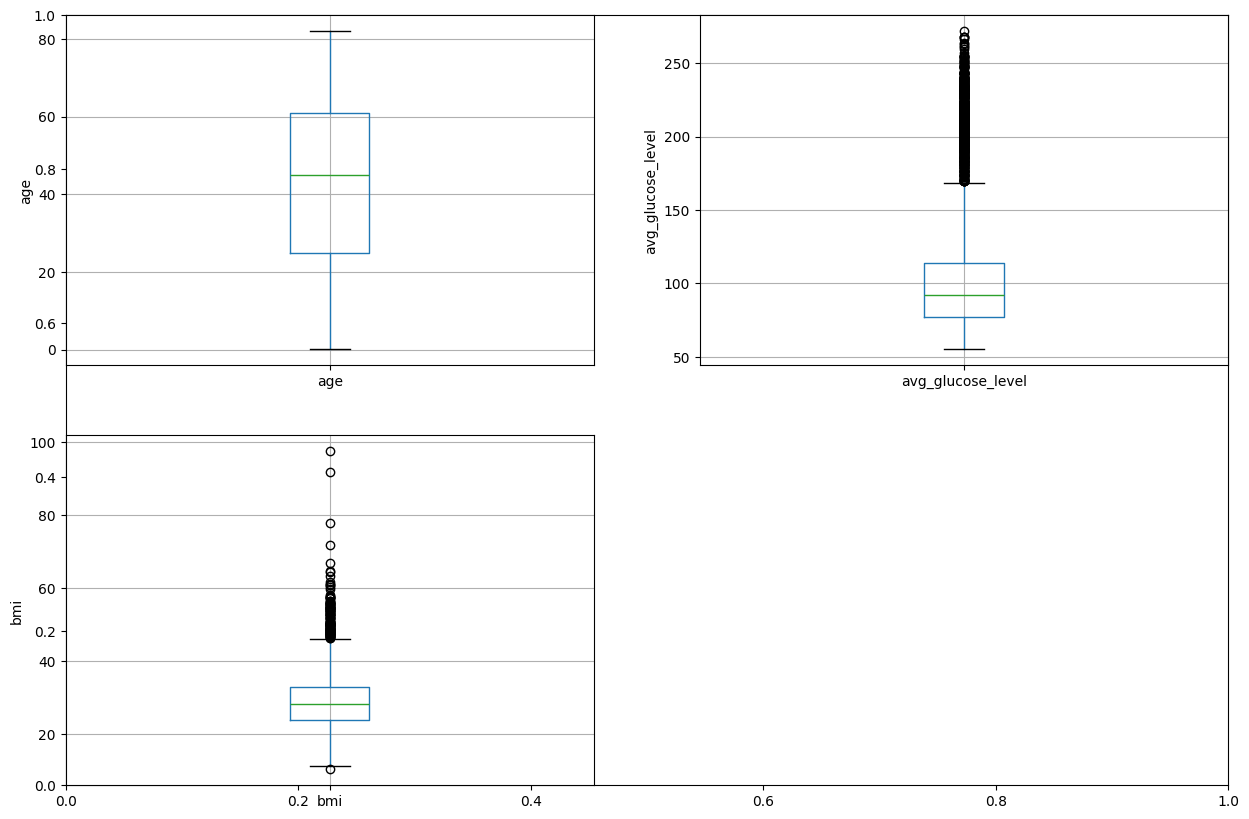

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(palette='bright')

plt.subplot(2, 2, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='avg_glucose_level')
fig.set_title('')
fig.set_ylabel('avg_glucose_level')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='bmi')
fig.set_title('')
fig.set_ylabel('bmi')


Now I'm going to draw histograms to check the distribution and find out if it is normal or skewed. If the variable is normally distributed, I will perform an Analysis of Extremes, but if the distribution is skewed, I will find the IQR (interquartile range).

Text(0, 0.5, 'stroke')

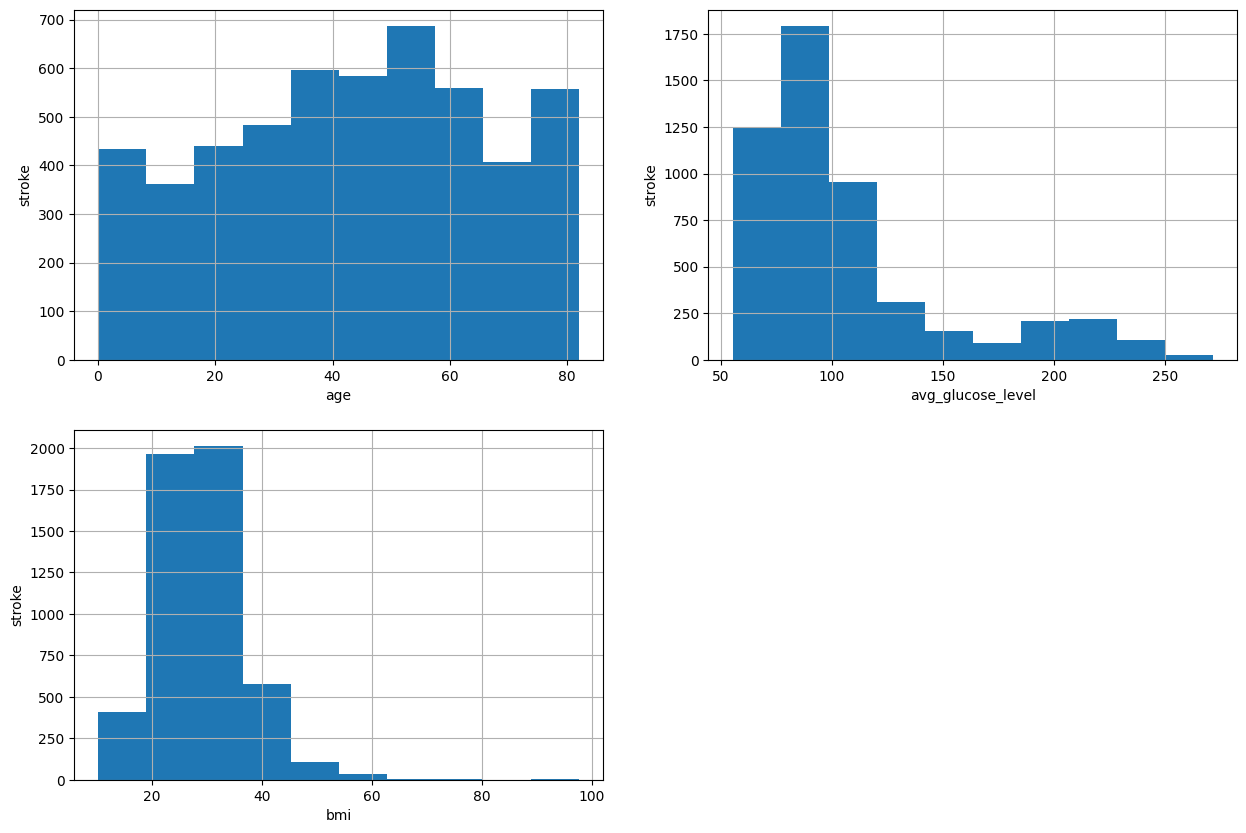

In [24]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
fig = df.age.hist(bins=10)
fig.set_xlabel('age')
fig.set_ylabel('stroke')

plt.subplot(2, 2, 2)
fig = df.avg_glucose_level.hist(bins=10)
fig.set_xlabel('avg_glucose_level')
fig.set_ylabel('stroke')


plt.subplot(2, 2, 3)
fig = df.bmi.hist(bins=10)
fig.set_xlabel('bmi')
fig.set_ylabel('stroke')

In [25]:
# age_IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
# age_lower_fence = df.age.quantile(0.25) - (age_IQR * 1.5)
# age_upper_fence = df.age.quantile(0.75) + (age_IQR * 1.5)
# print('age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=age_lower_fence, upperboundary=age_upper_fence))

# glucose_IQR = df.avg_glucose_level.quantile(0.75) - df.avg_glucose_level.quantile(0.25)
# glucose_lower_fence = df.avg_glucose_level.quantile(0.25) - (glucose_IQR * 1.5)
# glucose_upper_fence = df.avg_glucose_level.quantile(0.75) + (glucose_IQR * 1.5)

# print('avg_glucose_level outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=glucose_lower_fence, upperboundary=glucose_upper_fence))

# bmi_IQR = df.bmi.quantile(0.75) - df.bmi.quantile(0.25)
# bmi_lower_fence = df.bmi.quantile(0.25) - (bmi_IQR * 1.5)
# bmi_upper_fence = df.bmi.quantile(0.75) + (bmi_IQR * 1.5)
# print('bmi outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=bmi_lower_fence, upperboundary=bmi_upper_fence))

Обрізаємо викиди

In [26]:
# df.loc[df['age'] > age_upper_fence, 'age'] = age_upper_fence
# df.loc[df['age'] < age_lower_fence, 'age'] = age_lower_fence

# df.loc[df['avg_glucose_level'] > glucose_upper_fence, 'avg_glucose_level'] = glucose_upper_fence
# df.loc[df['avg_glucose_level'] < glucose_lower_fence, 'avg_glucose_level'] = glucose_lower_fence

# df.loc[df['bmi'] > bmi_upper_fence, 'bmi'] = bmi_upper_fence
# df.loc[df['bmi'] < bmi_lower_fence, 'bmi'] = bmi_lower_fence

In [27]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.863300,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.699785,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [28]:
stroke_counts = df['stroke'].value_counts()

print(stroke_counts)

stroke
0    4860
1     249
Name: count, dtype: int64


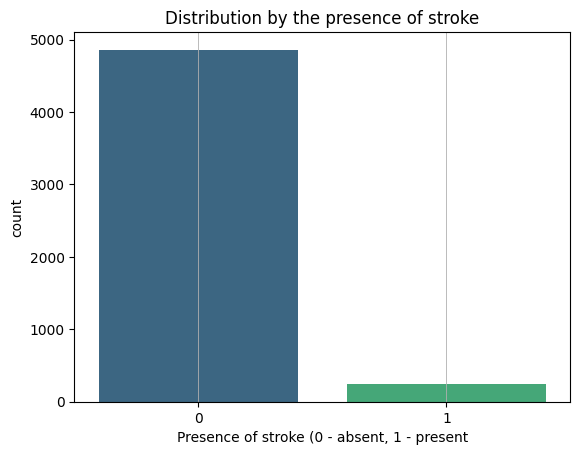

In [29]:
sns.countplot(x='stroke', data=df, hue='stroke', palette='viridis', dodge=False, legend=False)
plt.title('Distribution by the presence of stroke')
plt.xlabel('Presence of stroke (0 - absent, 1 - present')
plt.ylabel('count')
plt.grid(axis="x", linewidth = 0.6)
plt.show()

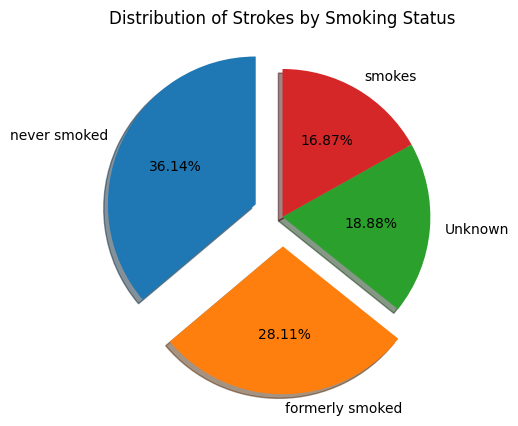

In [30]:
explode = (0.2, 0.2, 0, 0)
df.groupby('smoking_status')['stroke'].sum().nlargest(5).plot(kind='pie', autopct='%1.2f%%',  startangle=90,  title='Distribution of Strokes by Smoking Status'
                                                         ,explode=explode, shadow=True, ylabel='');

In [31]:
grouped_data = df.groupby('gender')['stroke'].count()

print(grouped_data)

gender
Female    2994
Male      2115
Name: stroke, dtype: int64


In [32]:
grouped_data = df.groupby(['gender', 'stroke']).size()
print(grouped_data)

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
dtype: int64


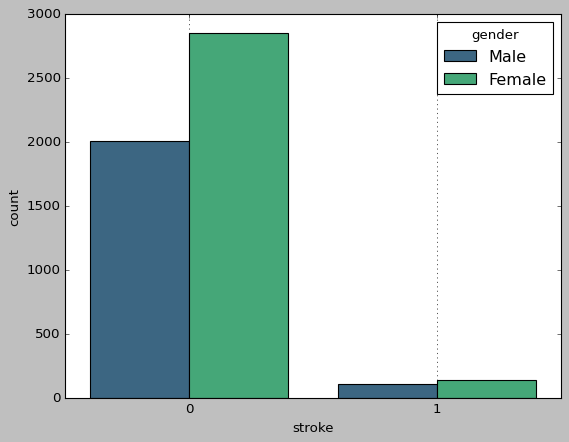

In [33]:
plt.style.use("classic")
sns.countplot(data=df, x="stroke", hue='gender', palette='viridis')
plt.title('')
plt.grid(axis="x", linewidth = 0.6)
plt.show()

In [34]:
df[categorical].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [ ]:
columns_to_encode = ['ever_married', 'gender', 'work_type', 'Residence_type', 'smoking_status']

print("Data types for encoding:")
print(df[columns_to_encode].dtypes)

df.loc[:, columns_to_encode] = df.loc[:, columns_to_encode].astype(str)

encoder = OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(df[columns_to_encode])

encoded_columns = encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=df.index)

df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

print(df.head())

Data types for encoding:
ever_married      object
gender            object
work_type         object
Residence_type    object
smoking_status    object
dtype: object
      id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046  67.0             0              1             228.69  36.6       1   
1  51676  61.0             0              0             202.21  28.1       1   
2  31112  80.0             0              1             105.92  32.5       1   
3  60182  49.0             0              0             171.23  34.4       1   
4   1665  79.0             1              0             174.12  24.0       1   

   ever_married_No  ever_married_Yes  gender_Female  ...  \
0              0.0               1.0            0.0  ...   
1              0.0               1.0            1.0  ...   
2              0.0               1.0            0.0  ...   
3              0.0               1.0            1.0  ...   
4              0.0               1.0            1.0  ..

[get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

The pd.get_dummies() method creates dummy columns for each categorical value. This means that it converts each category into a separate binary column.



In [36]:
# df = pd.get_dummies(df, columns=['ever_married', 'gender', 'work_type', 'Residence_type', 'smoking_status'])

# df

In [37]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'ever_married_No', 'ever_married_Yes', 'gender_Female',
       'gender_Male', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   avg_glucose_level               5109 non-null   float64
 5   bmi                             5109 non-null   float64
 6   stroke                          5109 non-null   int64  
 7   ever_married_No                 5109 non-null   float64
 8   ever_married_Yes                5109 non-null   float64
 9   gender_Female                   5109 non-null   float64
 10  gender_Male                     5109 non-null   float64
 11  work_type_Govt_job              5109 non-null   float64
 12  work_type_Never_worked          5109 no

In [39]:
correlation_matrix = df.drop(columns='id').corr()
correlation_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276367,0.263777,0.238323,0.324211,0.245239,-0.679084,0.679084,0.027752,-0.027752,...,-0.078667,0.116678,0.327949,-0.634320,-0.014031,0.014031,-0.378366,0.237347,0.119207,0.073075
hypertension,0.276367,1.000000,0.108292,0.174540,0.158252,0.127891,-0.164187,0.164187,-0.021223,0.021223,...,-0.021612,-0.005358,0.115417,-0.129535,0.007980,-0.007980,-0.141551,0.059022,0.065018,0.031213
heart_disease,0.263777,0.108292,1.000000,0.161907,0.036879,0.134905,-0.114601,0.114601,-0.085685,0.085685,...,-0.015715,0.000068,0.086742,-0.091654,-0.003045,0.003045,-0.066765,0.066938,-0.021893,0.044030
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.167033,0.131991,-0.155329,0.155329,-0.054722,0.054722,...,-0.014665,0.016451,0.062770,-0.102195,0.004783,-0.004783,-0.095035,0.067796,0.024011,0.017716
bmi,0.324211,0.158252,0.036879,0.167033,1.000000,0.036075,-0.334770,0.334770,0.026452,-0.026452,...,-0.028340,0.204057,0.070094,-0.442204,0.000444,-0.000444,-0.265052,0.103948,0.107524,0.084329
stroke,0.245239,0.127891,0.134905,0.131991,0.036075,1.000000,-0.108299,0.108299,-0.009081,0.009081,...,-0.014885,0.011927,0.062150,-0.083888,-0.015415,0.015415,-0.055924,0.064683,-0.004163,0.008920
ever_married_No,-0.679084,-0.164187,-0.114601,-0.155329,-0.334770,-0.108299,1.000000,-1.000000,-0.030171,0.030171,...,0.090873,-0.154104,-0.192637,0.544658,0.005988,-0.005988,0.332335,-0.171960,-0.102663,-0.105132
ever_married_Yes,0.679084,0.164187,0.114601,0.155329,0.334770,0.108299,-1.000000,1.000000,0.030171,-0.030171,...,-0.090873,0.154104,0.192637,-0.544658,-0.005988,0.005988,-0.332335,0.171960,0.102663,0.105132
gender_Female,0.027752,-0.021223,-0.085685,-0.054722,0.026452,-0.009081,-0.030171,0.030171,1.000000,-1.000000,...,-0.011486,0.032502,0.026045,-0.089226,-0.006105,0.006105,-0.059557,-0.043121,0.098952,-0.011408
gender_Male,-0.027752,0.021223,0.085685,0.054722,-0.026452,0.009081,0.030171,-0.030171,-1.000000,1.000000,...,0.011486,-0.032502,-0.026045,0.089226,0.006105,-0.006105,0.059557,0.043121,-0.098952,0.011408


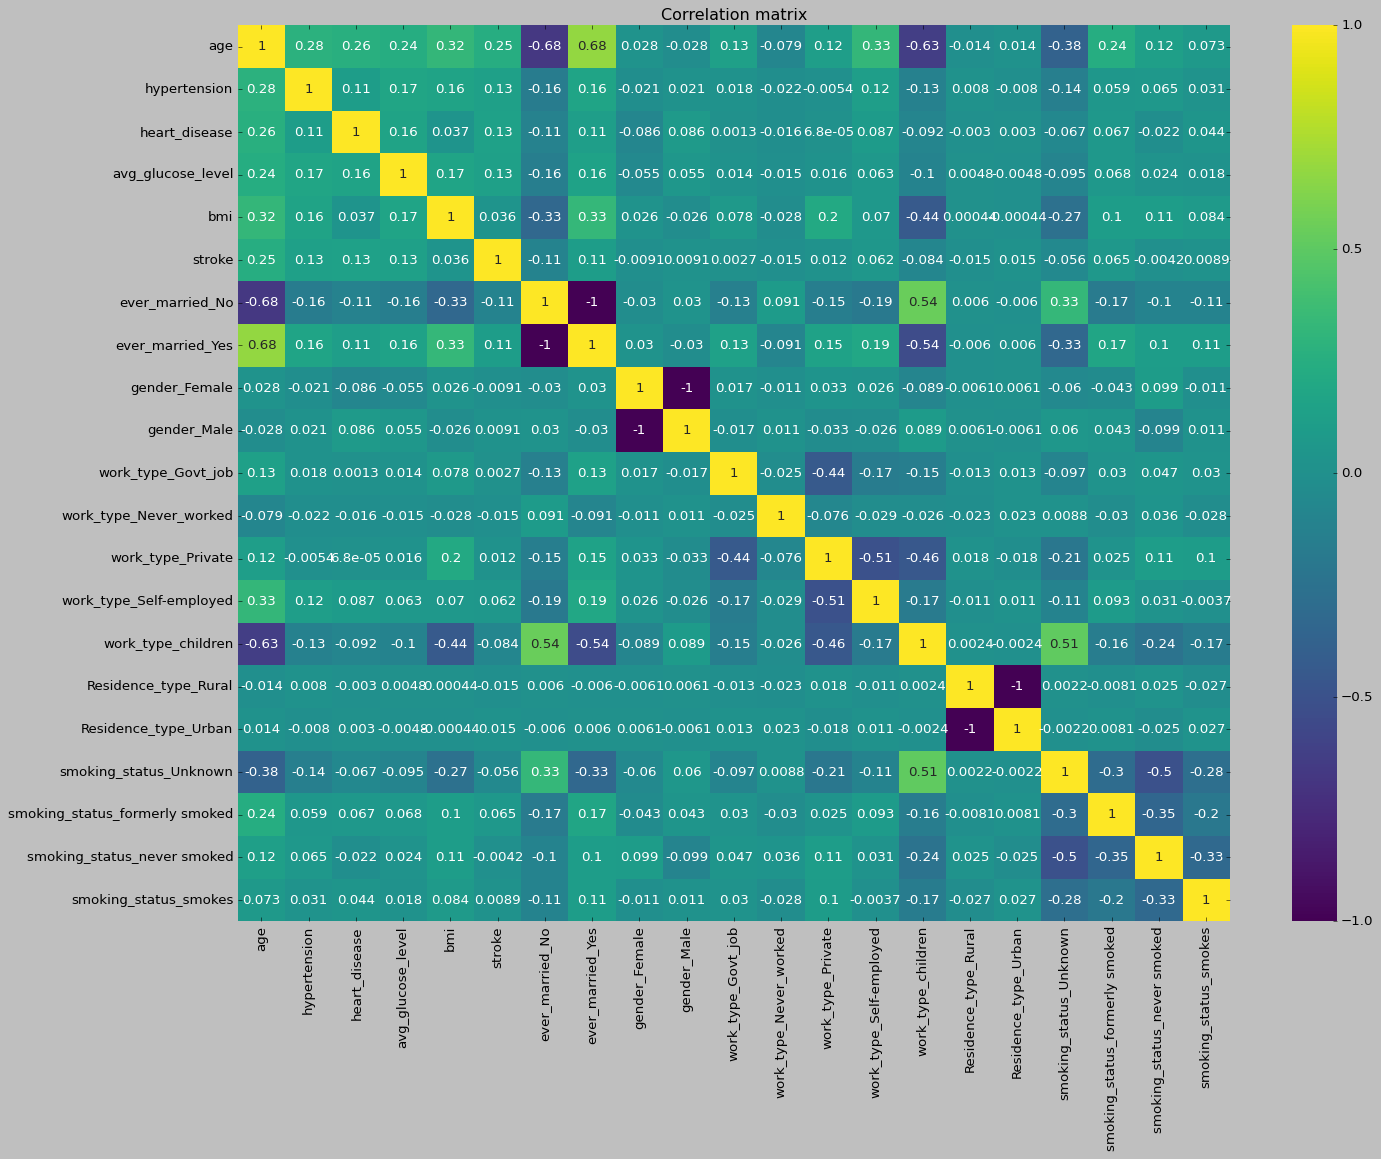

In [40]:
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation matrix")
plt.show()

In [41]:
correlation_with_stroke = correlation_matrix['stroke'].sort_values(ascending=False)

correlation_with_stroke

,stroke
stroke,1.000000
age,0.245239
heart_disease,0.134905
avg_glucose_level,0.131991
hypertension,0.127891
ever_married_Yes,0.108299
smoking_status_formerly smoked,0.064683
work_type_Self-employed,0.062150
bmi,0.036075
Residence_type_Urban,0.015415


# ***Correlation results:***

❌ ***Positive association with stroke risk***:

***age***: 0.245239 - older people have a higher risk;

***heart_disease***: 0.134905 - people with heart disease have a higher risk of stroke;

***hypertension***: 0.127891 - people with hypertension have a higher risk of stroke;

***avg_glucose_level***: 0.131991 - higher glucose levels are associated with a higher risk of stroke;

***ever_married_Yes***: 0.108299 - married people have a slightly higher risk of stroke;

***smoking_status_formerly smoked***: 0.064683 - former smokers have a higher risk of stroke;

***work_type_Self-employed***: 0.062150 - self-employed persons have a higher risk of stroke;

***bmi***: 0.036075 - higher body mass index is associated with higher risk of stroke;

---


❗***Positive but very weak association***:

***Residence_type_Urban***: 0.015415 - urban residence;

***work_type_Private***: 0.011927 - work in the private sector;

***gender_Male***: 0.009081 - male gender;

***smoking_status_smokes***: 0.008920 - smokers;

***work_type_Govt_job***: 0.002660 - work in the civil service;



---

❎ ***Negative but very weak relationship***:

***smoking_status_never smoked***: -0.004163 - people who have never smoked;

***gender_Female***: -0.009081 - female gender;

***work_type_Never_worked***: -0.014885 - people who have never worked;

***Residence_type_Rural***: -0.015415 - rural residence;


---
✅ ***Negative_relationship***:

***smoking_status_Unknown***: -0.055924 - people with unknown smoking status;

***work_type_children***: -0.083888 - children have a lower risk of stroke;

***ever_married_No***: -0.108299 - unmarried people have a lower risk of stroke.



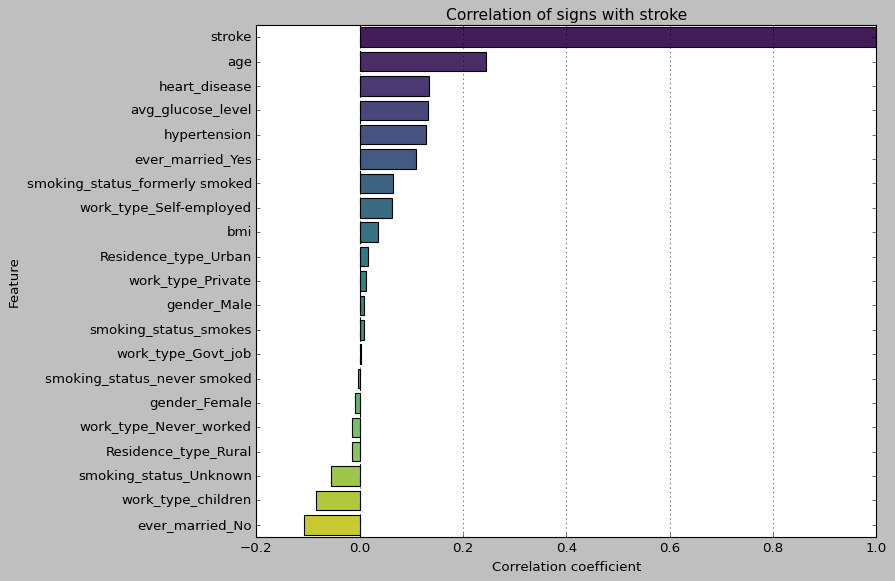

In [42]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x=correlation_with_stroke.values,
    y=correlation_with_stroke.index,
    hue=correlation_with_stroke.index,
    dodge=False,
    palette="viridis",
    legend=False
    )

plt.title('Correlation of signs with stroke', fontsize=14)
plt.xlabel("Correlation coefficient", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.axvline(0, color="black", linestyle="--")
plt.grid(axis="x", linewidth=0.6)
plt.show()

In [43]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,28.1,1,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.4,1,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.0,1,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# ***Model Training¶***

In [44]:
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

print(X.shape)
print(y.shape)

(5109, 20)
(5109,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4087, 20) (1022, 20)
(4087,) (1022,)


In [46]:
scaler = RobustScaler()

num_features = ['age', 'avg_glucose_level', 'bmi']

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [47]:
print(X_train.shape, X_test.shape)

(4087, 20) (1022, 20)


In [48]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2970,-0.638889,0,0,0.587234,-0.922222,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3593,-0.055556,0,0,-0.118325,1.288889,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4280,-0.750000,0,0,-0.078792,0.900000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2241,-1.111111,0,0,-0.494990,-0.366667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
449,-0.083333,0,0,-0.645985,0.322222,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
kf = KFold(shuffle=True, n_splits=5)

# ***LogisticRegression***

In [50]:
param_grid_log = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.5],
    'class_weight': ['balanced']
}

In [ ]:
log_model = LogisticRegression(max_iter=5000, solver='saga')

grid_search_log = GridSearchCV(log_model, param_grid_log, cv=kf, scoring='balanced_accuracy', n_jobs=-1, verbose=2)

grid_search_log.fit(X_train, y_train)

print("The best parameters:", grid_search_log.best_params_)

best_log_model = grid_search_log.best_estimator_

y_pred_train_log = best_log_model.predict(X_train)
y_pred_proba_train_log = best_log_model.predict_proba(X_train)[:, 1]

y_pred_test_log = best_log_model.predict(X_test)
y_pred_proba_test_log = best_log_model.predict_proba(X_test)[:, 1]

print("\nLogisticRegression on Train Data:")
print(classification_report(y_train, y_pred_train_log, zero_division=0))
print(confusion_matrix(y_train, y_pred_train_log))

print("\nLogisticRegression on Test Data:")
print(classification_report(y_test, y_pred_test_log, zero_division=0))
print(confusion_matrix(y_test, y_pred_test_log))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best parameters: {'C': 1.0, 'class_weight': 'balanced', 'l1_ratio': 0.5, 'penalty': 'elasticnet'}

LogisticRegression on Train Data:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      3888
           1       0.14      0.84      0.24       199

    accuracy                           0.75      4087
   macro avg       0.57      0.79      0.55      4087
weighted avg       0.95      0.75      0.82      4087

[[2882 1006]
 [  32  167]]

LogisticRegression on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.13      0.74      0.22        50

    accuracy                           0.75      1022
   macro avg       0.56      0.74      0.53      1022
weighted avg       0.94      0.75      0.82      1022

[[725 247]
 [ 13  37]]


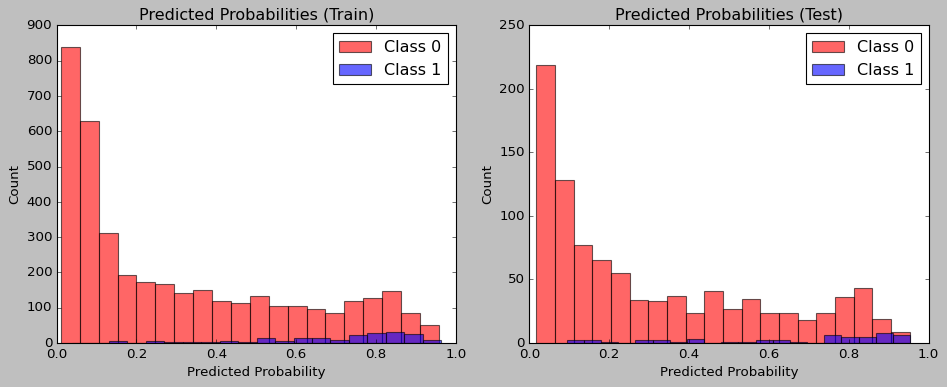

In [52]:
def plot_predicted_probabilities(y_train, y_train_proba, y_test, y_test_proba):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 col

    axes[0].hist(y_train_proba[y_train == 0], bins=20, alpha=0.6, color='red', label='Class 0')
    axes[0].hist(y_train_proba[y_train == 1], bins=20, alpha=0.6, color='blue', label='Class 1')
    axes[0].set_xlabel("Predicted Probability")
    axes[0].set_ylabel("Count")
    axes[0].set_title("Predicted Probabilities (Train)")
    axes[0].legend()

    axes[1].hist(y_test_proba[y_test == 0], bins=20, alpha=0.6, color='red', label='Class 0')
    axes[1].hist(y_test_proba[y_test == 1], bins=20, alpha=0.6, color='blue', label='Class 1')
    axes[1].set_xlabel("Predicted Probability")
    axes[1].set_ylabel("Count")
    axes[1].set_title("Predicted Probabilities (Test)")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

plot_predicted_probabilities(y_train, y_pred_proba_train_log, y_test, y_pred_proba_test_log)

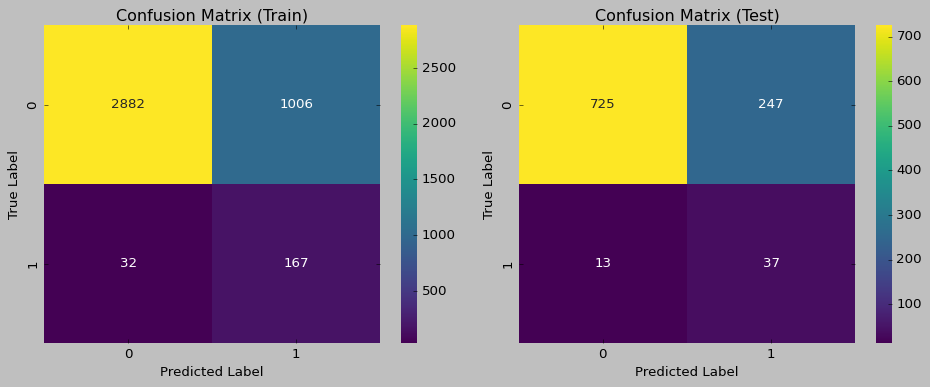

In [53]:
def plot_confusion_matrices(y_train, y_train_pred, y_test, y_test_pred):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    cm_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='viridis', xticklabels=[0,1], yticklabels=[0,1], ax=axes[0])
    axes[0].set_xlabel("Predicted Label")
    axes[0].set_ylabel("True Label")
    axes[0].set_title("Confusion Matrix (Train)")

    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='viridis', xticklabels=[0,1], yticklabels=[0,1], ax=axes[1])
    axes[1].set_xlabel("Predicted Label")
    axes[1].set_ylabel("True Label")
    axes[1].set_title("Confusion Matrix (Test)")

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(y_train, y_pred_train_log, y_test, y_pred_test_log)

***LogisticRegression with Elasticnet Regularization***

Results on training and test data:

The results on both training and test data are almost identical.

For class 0, I have high precision of - 0.99 and stable recall of 0.74.

For class 1, very low precision - 0.13 and f1-score - 0.22, and the recall results are different, training - 0.84, test - 0.74.

***Conclusion****

Logistic regression with Elasticnet Regularization provides a stable performance for the main class, but is not able to adequately recognize the less represented class. This may indicate that the model does not sufficiently differentiate important features that affect the positive class.

# ***DecisionTreeClassifier¶***

In [54]:
param_grid_dt = {
        'max_depth': [None],
        'min_samples_split': [10],
        'min_samples_leaf': [4],
        'max_features': [None],
        'class_weight': ['balanced'],
}

# param_grid_dt = {
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'max_features': [None, 'sqrt', 'log2'],
#         'class_weight': ['balanced'],
# }

In [55]:
dt_model = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=kf, scoring='balanced_accuracy', n_jobs=-1, verbose=2)

grid_search_dt.fit(X_train, y_train)

print("The best parameters:", grid_search_dt.best_params_)

best_dt_model = grid_search_dt.best_estimator_

y_pred_train_dt = best_dt_model.predict(X_train)
y_pred_proba_train_dt = best_dt_model.predict_proba(X_train)[:, 1]

y_pred_test_dt = best_dt_model.predict(X_test)
y_pred_proba_test_dt = best_dt_model.predict_proba(X_test)[:, 1]

print("\DecisionTreeClassifier on Train Data:")
print(classification_report(y_train, y_pred_train_dt, zero_division=0))
print(confusion_matrix(y_train, y_pred_train_dt))

print("\DecisionTreeClassifier on Test Data:")
print(classification_report(y_test, y_pred_test_dt, zero_division=0))
print(confusion_matrix(y_test, y_pred_test_dt))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best parameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
\DecisionTreeClassifier on Train Data:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3888
           1       0.44      1.00      0.61       199

    accuracy                           0.94      4087
   macro avg       0.72      0.97      0.79      4087
weighted avg       0.97      0.94      0.95      4087

[[3638  250]
 [   0  199]]
\DecisionTreeClassifier on Test Data:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.14      0.32      0.20        50

    accuracy                           0.87      1022
   macro avg       0.55      0.61      0.56      1022
weighted avg       0.92      0.87      0.89      1022

[[875  97]
 [ 34  16]]


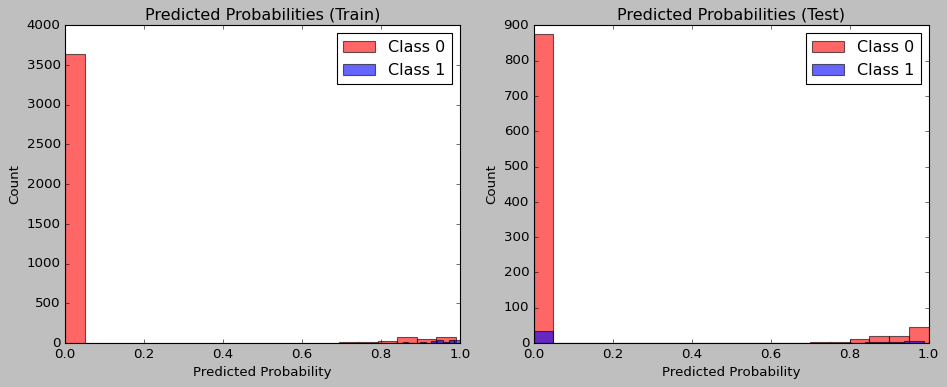

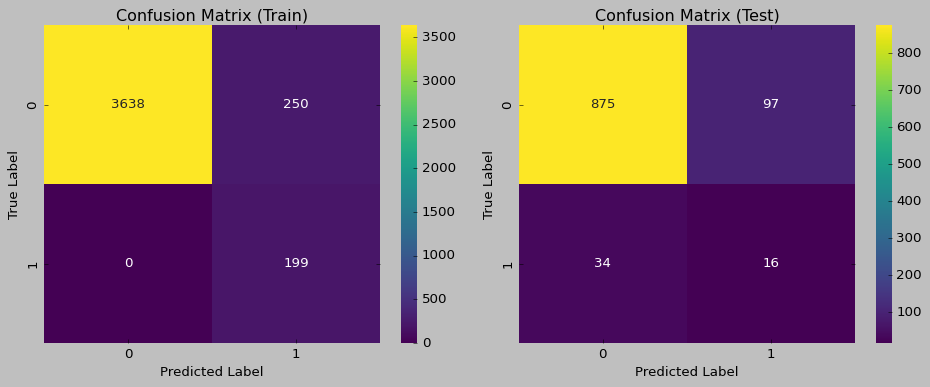

In [56]:
plot_predicted_probabilities(y_train, y_pred_proba_train_dt, y_test, y_pred_proba_test_dt)
plot_confusion_matrices(y_train, y_pred_train_dt, y_test, y_pred_test_dt)

#***Analysis of DecisionTreeClassifier:***

Results on the training data:

Class 0 - high both recall - 0.94 and precision - 1.

Class 1 - high recall - 1, but low precision - 0.44.

Results on the test data:

For class 0, the results are good compared to the training set, with precision of 0.96 and recall of 0.9.

For class 1, the performance decreases: recall 0.32 and precision 0.14.

***Conclusion***:

The decision tree demonstrates the ability to “catch” most positive examples - high recall, but due to a large number of false positives, low precision. Perhaps the model adapts too much to the training data by overfitting, which impairs its generalization.

# ***RandomForestClassifier***

In [57]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt'],
    'class_weight': ['balanced'],
}

# param_grid_rf = {
#     'n_estimators': [50],
#     'max_depth': [10],
#     'min_samples_split': [10],
#     'min_samples_leaf': [2],
#     'max_features': [None],
#     'class_weight': ['balanced'],
# }

In [58]:
rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=kf, scoring='balanced_accuracy', n_jobs=-1, verbose=2)

# grid_search_rf.fit(X_train_resampled, y_train_resampled)

grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_

y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_proba_train_rf = best_rf_model.predict_proba(X_train)[:, 1]

y_pred_test_rf = best_rf_model.predict(X_test)
y_pred_proba_test_rf = best_rf_model.predict_proba(X_test)[:, 1]

print("\nRandomForestClassifier on Train Data:")
print(classification_report(y_train, y_pred_train_rf, zero_division=0))
print(confusion_matrix(y_train, y_pred_train_rf))

print("\nRandomForestClassifier on Test Data:")
print(classification_report(y_test, y_pred_test_rf, zero_division=0))
print(confusion_matrix(y_test, y_pred_test_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

RandomForestClassifier on Train Data:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3888
           1       0.50      0.98      0.67       199

    accuracy                           0.95      4087
   macro avg       0.75      0.97      0.82      4087
weighted avg       0.98      0.95      0.96      4087

[[3695  193]
 [   3  196]]

RandomForestClassifier on Test Data:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.17      0.26      0.21        50

    accuracy                           0.90      1022
   macro avg       0.57      0.60      0.58      1022
weighted avg       0.92      0.90      0.91      1022

[[909  63]
 [ 37  13]]


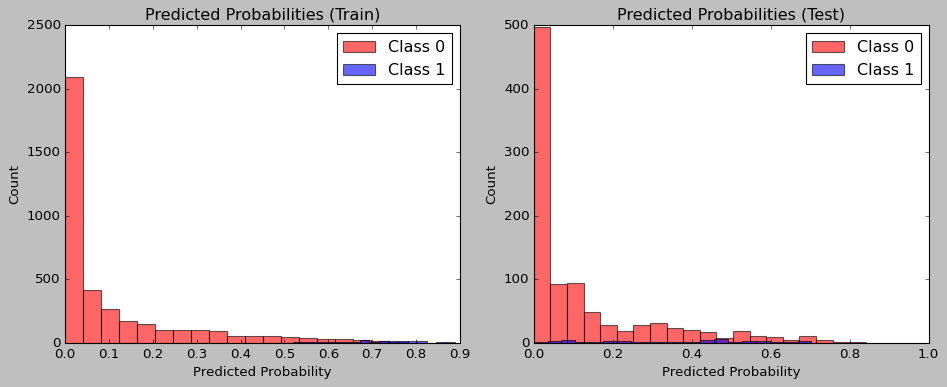

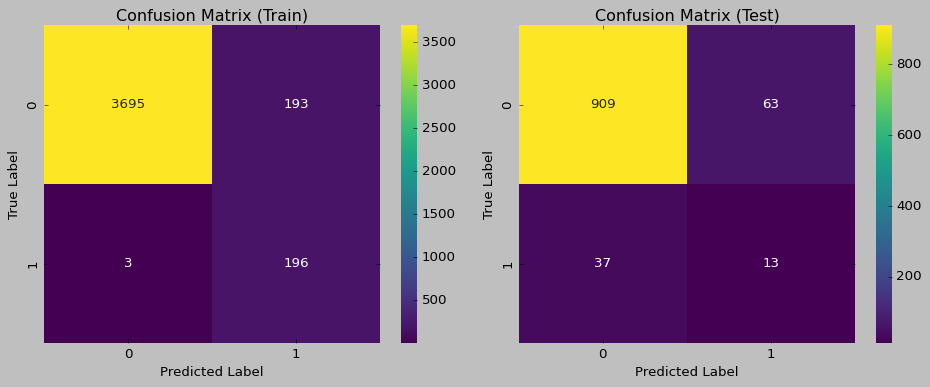

In [59]:
plot_predicted_probabilities(y_train, y_pred_proba_train_rf, y_test, y_pred_proba_test_rf)
plot_confusion_matrices(y_train, y_pred_train_rf, y_test, y_pred_test_rf)

#***RandomForestClassifier***

Results:

On the training data, a very high level of accuracy for class 0.

For class 1 - low precision - 0.90.

On the test data, the performance for class 1 decreases significantly, precision - 0.18, recall - 0.28.

For class 0, the results slightly decreased, but not critically.

***Conclusion***:

RandomForest works well with a more represented class, but despite the use of class weighting, the performance for a smaller class remains unsatisfactory. This may be due to the lack of positive examples to train the ensemble.

# ***RandomForestClassifier analysis:***

- Overfitting: The model performs well on the training data with a slight decrease on the test data, which may indicate a slight overfitting.

Class 1: Slight improvement in Precision and Recall for Class 1 compared to Decision Tree.

# ***GradientBoostingClassifier***

In [60]:
param_grid_gb = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
}

# param_grid_gb = {
#         'n_estimators': [50],
#         'learning_rate': [0.01],
#         'max_depth': [7],
#         'min_samples_split': [10],
#         'min_samples_leaf': [1],
# }

In [61]:
gb_model = GradientBoostingClassifier(random_state=1)

grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=kf, scoring='balanced_accuracy', n_jobs=-1, verbose=2)

grid_search_gb.fit(X_train, y_train)

print("Best parameters:", grid_search_gb.best_params_)

best_gb_model = grid_search_gb.best_estimator_

y_pred_train_gb = best_gb_model.predict(X_train)
y_pred_proba_train_gb = best_gb_model.predict_proba(X_train)[:, 1]

y_pred_test_gb = best_gb_model.predict(X_test)
y_pred_proba_test_gb = best_gb_model.predict_proba(X_test)[:, 1]

print("\GradientBoostingClassifier on Train Data:")
print(classification_report(y_train, y_pred_train_gb, zero_division=0))
print(confusion_matrix(y_train, y_pred_train_gb))

print("\GradientBoostingClassifier on Test Data:")
print(classification_report(y_test, y_pred_test_gb, zero_division=0))
print(confusion_matrix(y_test, y_pred_test_gb))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
\GradientBoostingClassifier on Train Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3888
           1       0.99      0.60      0.75       199

    accuracy                           0.98      4087
   macro avg       0.99      0.80      0.87      4087
weighted avg       0.98      0.98      0.98      4087

[[3887    1]
 [  79  120]]
\GradientBoostingClassifier on Test Data:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.22      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.59      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022

[[965   7]
 [ 48   2]]


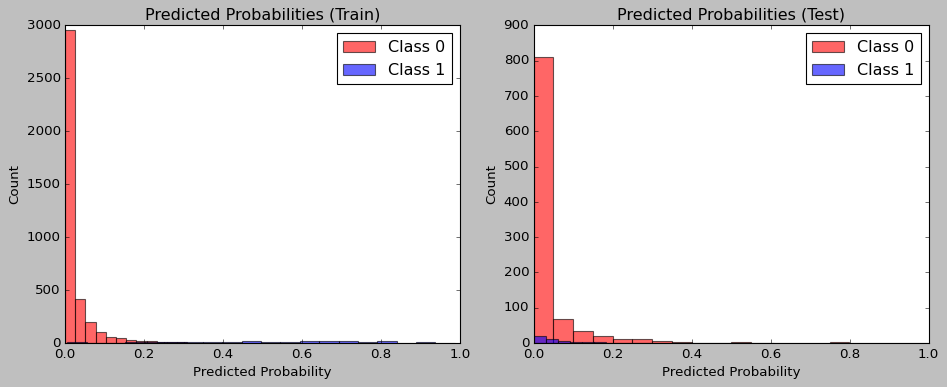

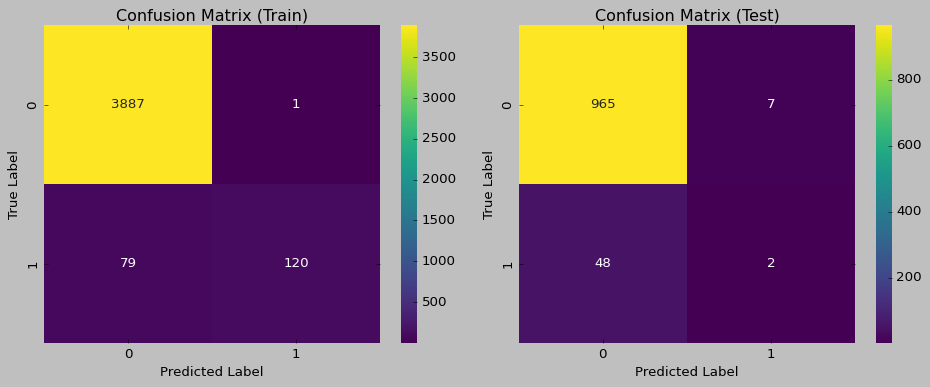

In [62]:
plot_predicted_probabilities(y_train, y_pred_proba_train_gb, y_test, y_pred_proba_test_gb)
plot_confusion_matrices(y_train, y_pred_train_gb, y_test, y_pred_test_gb)

# ***Analysis of GradientBoostingClassifier:***

***Results***:

The training set showed quite good results for class 0 and reduced recall - 0.6 and f1 - 0.75, for class 1.

The test set demonstrates that the model predicts only class 0 without “seeing” the positive class, with positive examples classified as almost as 0, recall of 0.04 and f1 of 0.07.

***Conclusion***:

The model does not fully adapt to the underrepresented class, suggesting that gradient boosting can be very sensitive to data imbalance, especially when using the default settings.

# ***BalancedRandomForestClassifier***

In [63]:
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

brf_model.fit(X_train, y_train)

y_pred_train_brf = brf_model.predict(X_train)
y_pred_proba_train_brf = brf_model.predict_proba(X_train)[:, 1]

y_pred_test_brf = brf_model.predict(X_test)
y_pred_proba_test_brf = brf_model.predict_proba(X_test)[:, 1]

print("\BalancedRandomForestClassifier on Train Data:")
print(classification_report(y_train, y_pred_train_brf, zero_division=0))
print(confusion_matrix(y_train, y_pred_train_brf))

print("\BalancedRandomForestClassifier on Test Data:")
print(classification_report(y_test, y_pred_test_brf, zero_division=0))
print(confusion_matrix(y_test, y_pred_test_brf))

\BalancedRandomForestClassifier on Train Data:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      3888
           1       0.21      1.00      0.35       199

    accuracy                           0.82      4087
   macro avg       0.60      0.90      0.62      4087
weighted avg       0.96      0.82      0.87      4087

[[3134  754]
 [   0  199]]
\BalancedRandomForestClassifier on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       972
           1       0.15      0.72      0.25        50

    accuracy                           0.79      1022
   macro avg       0.57      0.76      0.57      1022
weighted avg       0.94      0.79      0.85      1022

[[774 198]
 [ 14  36]]


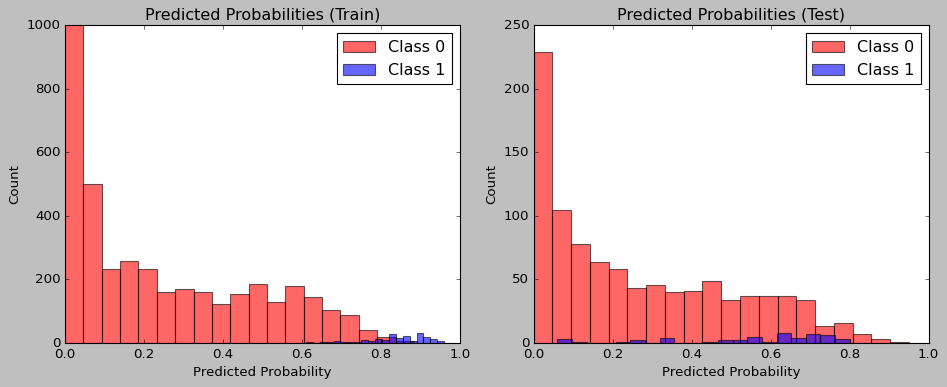

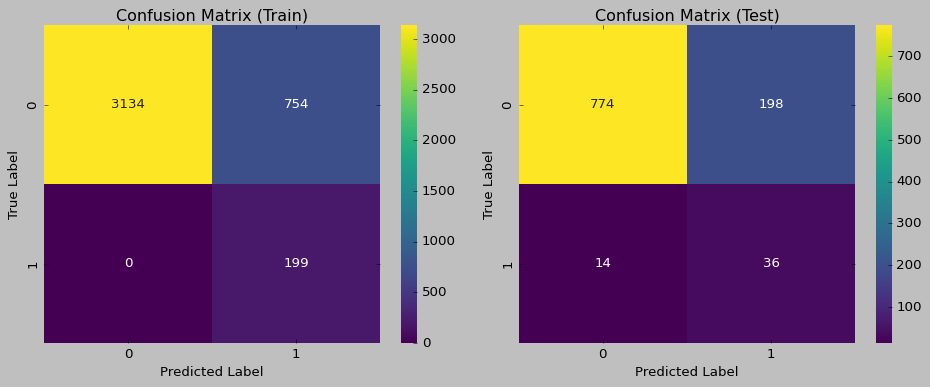

In [64]:
plot_predicted_probabilities(y_train, y_pred_proba_train_brf, y_test, y_pred_proba_test_brf)
plot_confusion_matrices(y_train, y_pred_train_brf, y_test, y_pred_test_brf)

#***BalancedRandomForestClassifier***.

***Results***:

On the training data - for class 0: high precision - 1.00 with recall - 0.81, for class 1 - recall - 1.00, but very low precision - 0.21.

The test data shows a similar picture: for class 1, recall is 0.72, but precision is only 0.15.

***Conclusion***:

BalancedRandomForest tries to balance the data by undersampling a larger class, which allows to achieve high recall for the positive class, but this is accompanied by a high number of false positives (low precision).

# ***Summing up***

Logistic Regression provides stable but generally insufficient performance for the positive class.

Decision Tree and RandomForest show some improvement for the positive class due to high recall, but low precision indicates excessive “catching” of random positives.

GradientBoosting is not able to distinguish the positive class, which makes it unsuitable in this scenario.

BalancedRandomForest can help to increase recall for the positive class, but the high false positive rate negatively affects the precision.

If the main goal is not to miss patients, i.e. to minimize false negatives, then the key metric is ***Recall***, namely, the sensitivity for class 1.

Recall determines the proportion of correctly identified patients among all valid patients, which is critical if we are more concerned about the situation when a sick patient is classified as healthy.

The main metric is **Recall** for the positive class, i.e., minimization of false negatives, and from the results provided, ***LogisticRegression*** demonstrates the highest recall for class 1 - 0.87 on the test data.

This means that 87% of sick patients were correctly identified, which is critical if a diagnostic error can lead to a patient being classified as healthy.

However, it's important to remember that high recall can be accompanied by low precision - a lot of false positives. In my case, the precision for class 1 remains low at 0.16, but if the main goal is to minimize missed patients, then logistic regression is the most appropriate.

Main conclusions:

LogisticRegression has a recall for class 1 on the test data of 0.87, which is the best result among all models.
The other models (Decision Tree, RandomForest, GradientBoosting, BalancedRandomForest) show much lower recall for class 1 (from 0 to 0.72).

***Therefore, if the main goal is not to miss sick patients, the most appropriate model is LogisticRegression.***

# ***Model Comparison***


In [65]:
#  LogisticRegression
precision_train_log = precision_score(y_train, y_pred_train_log)
recall_train_log = recall_score(y_train, y_pred_train_log)
f1_train_log = f1_score(y_train, y_pred_train_log)
accuracy_train_log = accuracy_score(y_train, y_pred_train_log)

precision_test_log = precision_score(y_test, y_pred_test_log)
recall_test_log = recall_score(y_test, y_pred_test_log)
f1_test_log = f1_score(y_test, y_pred_test_log)
accuracy_test_log = accuracy_score(y_test, y_pred_test_log)

#DecisionTree
precision_train_dt = precision_score(y_train, y_pred_train_dt)
recall_train_dt = recall_score(y_train, y_pred_train_dt)
f1_train_dt = f1_score(y_train, y_pred_train_dt)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)

precision_test_dt = precision_score(y_test, y_pred_test_dt)
recall_test_dt = recall_score(y_test, y_pred_test_dt)
f1_test_dt = f1_score(y_test, y_pred_test_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

# RandomForest
precision_train_rf = precision_score(y_train, y_pred_train_rf)
recall_train_rf = recall_score(y_train, y_pred_train_rf)
f1_train_rf = f1_score(y_train, y_pred_train_rf)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)

precision_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# GradientBoosting
precision_train_gb = precision_score(y_train, y_pred_train_gb)
recall_train_gb = recall_score(y_train, y_pred_train_gb)
f1_train_gb = f1_score(y_train, y_pred_train_gb)
accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)

precision_test_gb = precision_score(y_test, y_pred_test_gb)
recall_test_gb = recall_score(y_test, y_pred_test_gb)
f1_test_gb = f1_score(y_test, y_pred_test_gb)
accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb)

# BalancedRandomForest
precision_train_brf = precision_score(y_train, y_pred_train_brf)
recall_train_brf = recall_score(y_train, y_pred_train_brf)
f1_train_brf = f1_score(y_train, y_pred_train_brf)
accuracy_train_brf = accuracy_score(y_train, y_pred_train_brf)

precision_test_brf = precision_score(y_test, y_pred_test_brf)
recall_test_brf = recall_score(y_test, y_pred_test_brf)
f1_test_brf = f1_score(y_test, y_pred_test_brf)
accuracy_test_brf = accuracy_score(y_test, y_pred_test_brf)

data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Balanced Random Forest'] * 2,
    'Dataset': ['Train'] * 5 + ['Test'] * 5,
    'precision': [
        precision_train_log, precision_train_dt, precision_train_rf, precision_train_gb, precision_train_brf,
        precision_test_log, precision_test_dt, precision_test_rf, precision_test_gb, precision_test_brf
    ],
    'recall': [
        recall_train_log, recall_train_dt, recall_train_rf, recall_train_gb, recall_train_brf,
        recall_test_log, recall_test_dt, recall_test_rf, recall_test_gb, recall_test_brf
    ],
    'f1_score': [
        f1_train_log, f1_train_dt, f1_train_rf, f1_train_gb, f1_train_brf,
        f1_test_log, f1_test_dt, f1_test_rf, f1_test_gb, f1_test_brf
    ],
    'accuracy': [
        accuracy_train_log, accuracy_train_dt, accuracy_train_rf, accuracy_train_gb, accuracy_train_brf,
        accuracy_test_log, accuracy_test_dt, accuracy_test_rf, accuracy_test_gb, accuracy_test_brf
    ]
}

results = pd.DataFrame(data)
print(results)


                    Model Dataset  precision    recall  f1_score  accuracy
0     Logistic Regression   Train   0.142370  0.839196  0.243440  0.746024
1           Decision Tree   Train   0.443207  1.000000  0.614198  0.938830
2           Random Forest   Train   0.503856  0.984925  0.666667  0.952043
3       Gradient Boosting   Train   0.991736  0.603015  0.750000  0.980426
4  Balanced Random Forest   Train   0.208814  1.000000  0.345486  0.815513
5     Logistic Regression    Test   0.130282  0.740000  0.221557  0.745597
6           Decision Tree    Test   0.141593  0.320000  0.196319  0.871820
7           Random Forest    Test   0.171053  0.260000  0.206349  0.902153
8       Gradient Boosting    Test   0.222222  0.040000  0.067797  0.946184
9  Balanced Random Forest    Test   0.153846  0.720000  0.253521  0.792564


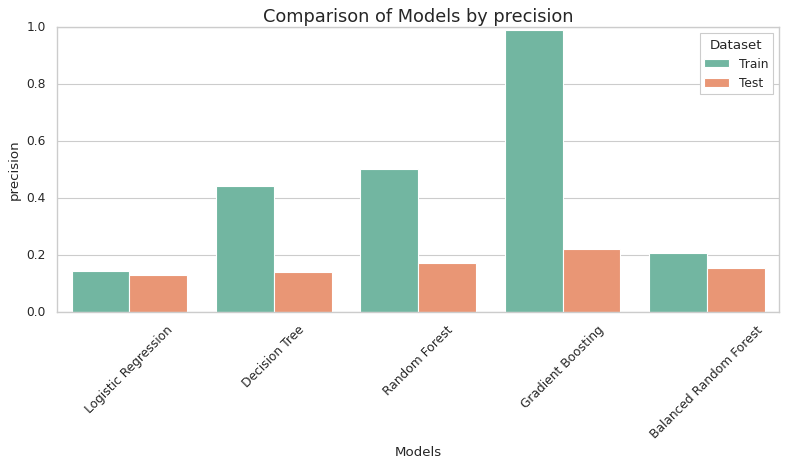

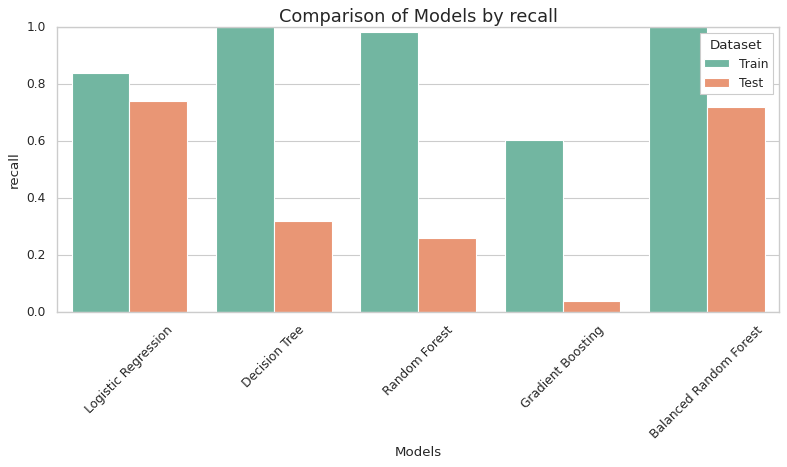

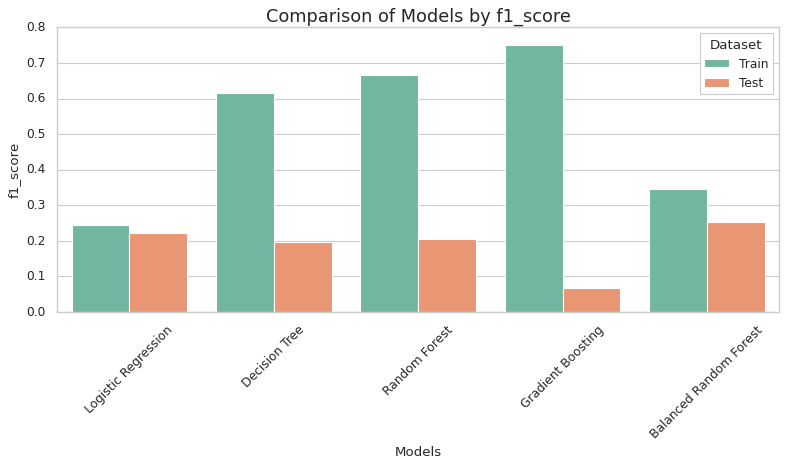

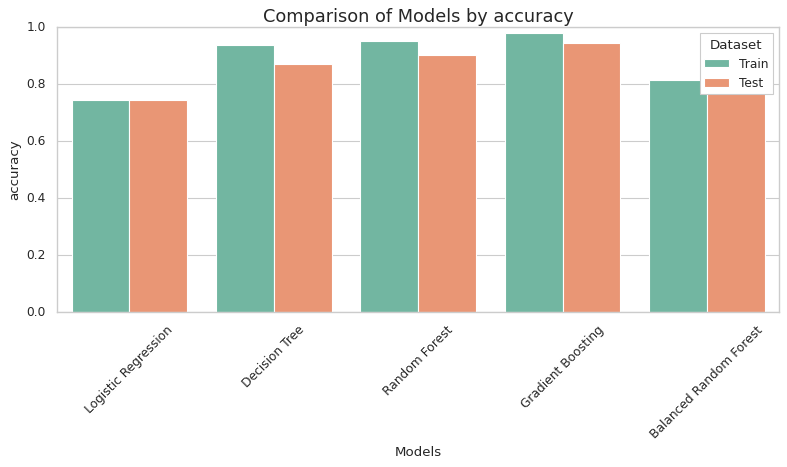

In [66]:
def plot_model_comparison(results, plot_type='bar'):
    sns.set(style="whitegrid")

    metrics = ['precision', 'recall', 'f1_score', 'accuracy']
    model_names = results['Model'].unique()

    for metric in metrics:
        plt.figure(figsize=(10, 6))

        if plot_type == 'bar':
            sns.barplot(data=results, x='Model', y=metric, hue='Dataset', palette='Set2')
            plt.title(f'Comparison of Models by {metric}', fontsize=16)
        else:
            raise ValueError("Invalid plot_type. Choose from 'bar', 'line', or 'scatter'.")

        plt.ylabel(metric, fontsize=12)
        plt.xlabel('Models', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title='Dataset')
        plt.tight_layout()
        plt.show()

plot_model_comparison(results, plot_type='bar')

#  💓***Summing up***

***LogisticRegression*** and ***BalancedRandomForestClassifier*** show the highest sensitivity on the test dataset. However, considering also other metrics such as precision and F1-measure, the balanced random forest may be a more suitable choice for this task.

If the ***primary goal*** is not to miss patients, i.e. minimize false negatives, then the key metric is ***Recall***, namely the sensitivity for class 1.

Recall determines the proportion of correctly identified patients among all valid patients, which is critical if we are more concerned about a situation where a sick patient is classified as healthy.

The main metric is Recall for a positive class, i.e. minimizing false negatives, and from the presented results, LogisticRegression demonstrates the highest recall for class 1 - 0.74 on the test data, BalancedRandomForestClassifier - 0.72.

This means that 74% and 72% of sick patients, respectively, were correctly identified, which is critical if a diagnostic error can lead to a patient being classified as healthy.

However, it is important to remember that a high level of memorization can be accompanied by low accuracy - a large number of false positives. In my case, the accuracy for class 1 remains low for LogisticRegression - 0.13 and for BalancedRandomForestClassifier - 0.15.

✅ ***Therefore, if the main goal is not to miss sick patients, then LogisticRegression is the most appropriate model.***

#***Saving Models and Scaler***

In [69]:
output_dir = "saved_models"
os.makedirs(output_dir, exist_ok=True)

joblib.dump(grid_search_log, os.path.join(output_dir, "LogisticRegression.pkl"))
joblib.dump(grid_search_dt, os.path.join(output_dir, "DecisionTreeClassifier.pkl"))
joblib.dump(grid_search_rf, os.path.join(output_dir, "RandomForestClassifier.pkl"))
joblib.dump(grid_search_gb, os.path.join(output_dir, "GradientBoostingClassifier.pkl"))
joblib.dump(brf_model, os.path.join(output_dir, "BalancedRandomForestClassifier.pkl"))

joblib.dump(encoder, os.path.join(output_dir, 'encoder.pkl'))
joblib.dump(scaler, os.path.join(output_dir, "scaler.pkl"))

print(f"Models and scalers saved in folder: {output_dir}")

Models and scalers saved in folder: saved_models


In [ ]:
for filename in os.listdir(output_dir):
    files.download(os.path.join(output_dir, filename))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>